In [86]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from astropy.table import Table, join

In [69]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [37]:
apogee = Table.read("../src/data/allStarLite-dr17-synspec_rev1.fits", hdu=1)

In [38]:
gaia = Table.read("../src/data/allStar-dr17-synspec-gaiaedr3-xm.fits", hdu=1)

In [44]:
tbl = join(apogee, gaia, keys="APOGEE_ID")

In [47]:
clean_tbl = tbl[
      (tbl['LOGG'] > 1) & (tbl['LOGG'] < 5.5)  # realistic spectroscopic stellar parameters (surface gravity)
    & (tbl['TEFF'] > 3500) & (tbl['TEFF'] < 8000)  # same (effective / surface temperature)
    & (tbl['M_H'] > -2) & (tbl['M_H'] < 0.6)  # realistic "bulk metallicity" measurement
    & (tbl['ALPHA_M'] > -1) & (tbl['ALPHA_M'] < 1)  # realistic alpha abundance measurement
    & ((tbl['parallax'] / tbl['parallax_error']) > 8)  # well-measured parallax - the 8 is arbitrary!
]

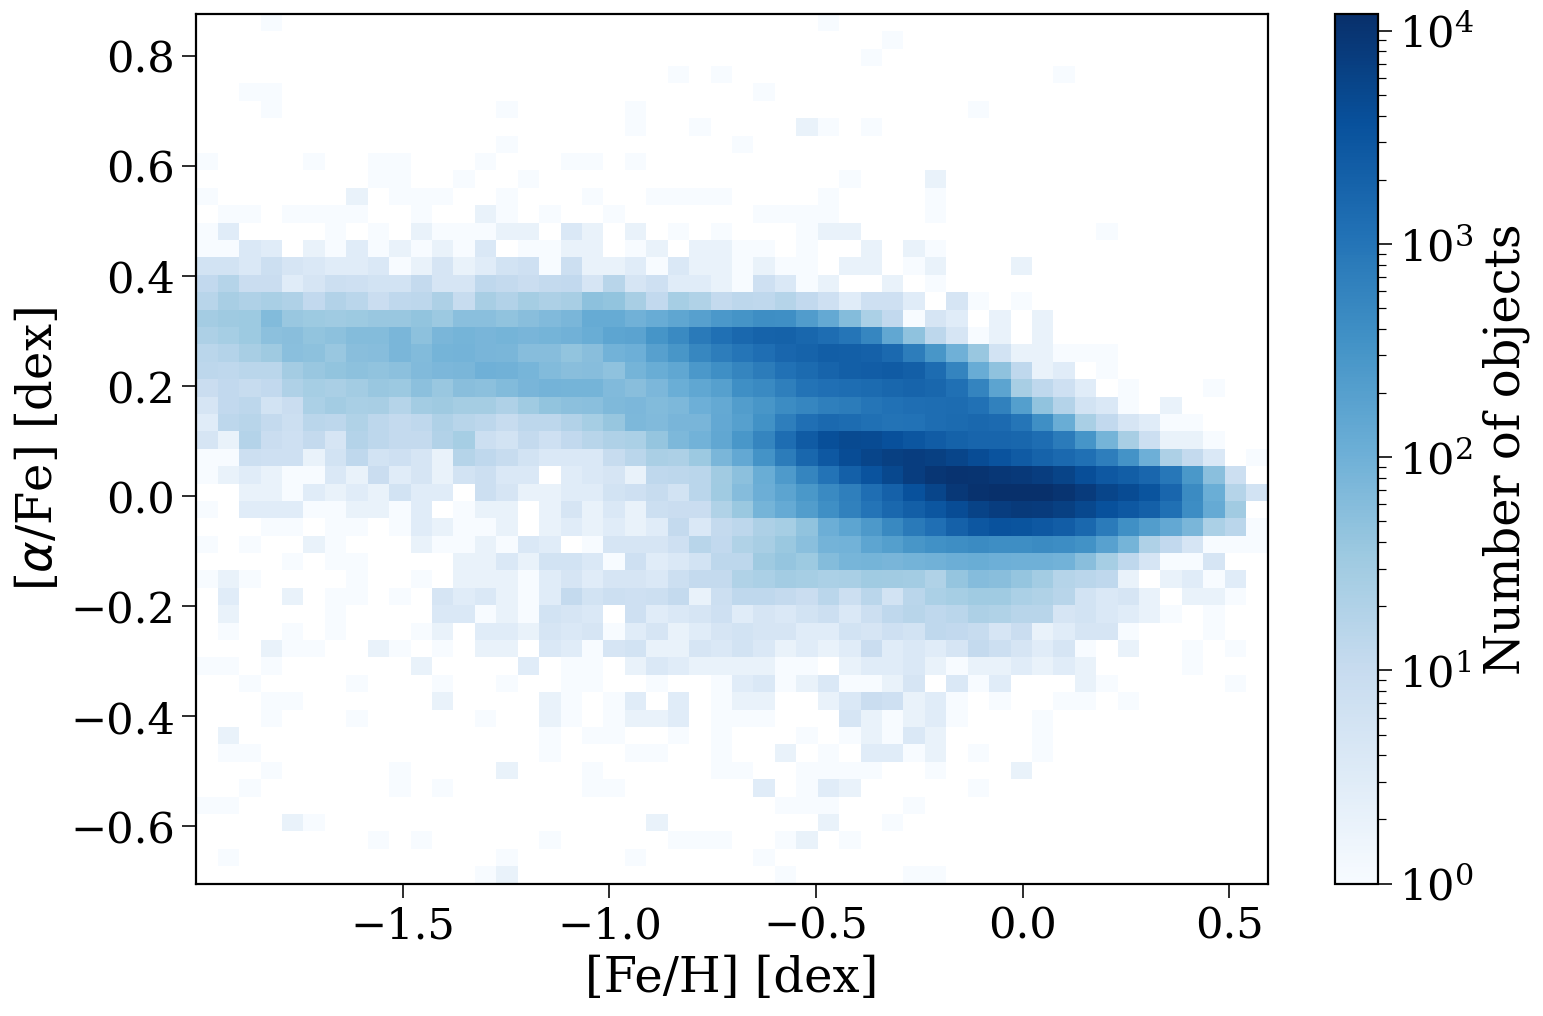

In [85]:
fig, ax = plt.subplots()

counts, xedges, yedges, im = ax.hist2d(clean_tbl["M_H"], clean_tbl["ALPHA_M"], bins=50, norm=LogNorm(), cmap="Blues")
cbar = fig.colorbar(im, ax=ax, label="Number of objects")

ax.set_xlabel("[Fe/H] [dex]")
ax.set_ylabel(r"[$\alpha$/Fe] [dex]")

plt.show()